In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import pathlib

In [24]:
TRAINING_DIR = "data_1/train"
VALIDATION_DIR = "data_1/test"

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                    target_size=(128, 128))

Found 6549 images belonging to 41 classes.


In [25]:
validation_datagen = ImageDataGenerator(
    rescale=1.0/255
)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                        class_mode='categorical',
                                                        batch_size=32,
                                                        target_size=(128, 128))


Found 1611 images belonging to 41 classes.


In [19]:
pre_trained_model = VGG16(weights="imagenet", include_top=False,
                                input_tensor=Input(shape=(128, 128, 3)))

for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output


58889256/58889256 [==============================] - 75s 1us/step


In [20]:
x = tf.keras.layers.Flatten(name="flatten")(last_output)
x = tf.keras.layers.Dropout(0.3)(x)
#x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(41, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [21]:
int_lr = 1e-4
num_epochs = 100

optimizer = tf.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
H = model.fit(train_generator,
              epochs=num_epochs,
              steps_per_epoch=64,
              validation_steps=32,
              validation_data=validation_generator)


Epoch 1/100
64/64 [==============================] - 60s 932ms/step - loss: 1.8834 - accuracy: 0.4678
Epoch 2/100
64/64 [==============================] - 64s 991ms/step - loss: 1.9229 - accuracy: 0.4634
Epoch 3/100
64/64 [==============================] - 68s 1s/step - loss: 1.9332 - accuracy: 0.4868
Epoch 4/100
64/64 [==============================] - 61s 949ms/step - loss: 1.8593 - accuracy: 0.4944
Epoch 5/100
64/64 [==============================] - 61s 942ms/step - loss: 1.8982 - accuracy: 0.4873
Epoch 6/100
64/64 [==============================] - 60s 929ms/step - loss: 1.8846 - accuracy: 0.4927
Epoch 7/100
64/64 [==============================] - 60s 934ms/step - loss: 1.8823 - accuracy: 0.4978
Epoch 8/100
64/64 [==============================] - 59s 907ms/step - loss: 1.9951 - accuracy: 0.4775
Epoch 9/100
64/64 [==============================] - 58s 900ms/step - loss: 1.9131 - accuracy: 0.4885
Epoch 10/100
64/64 [==============================] - 61s 950ms/step - loss: 1.8464 -

KeyError: 'val_loss'

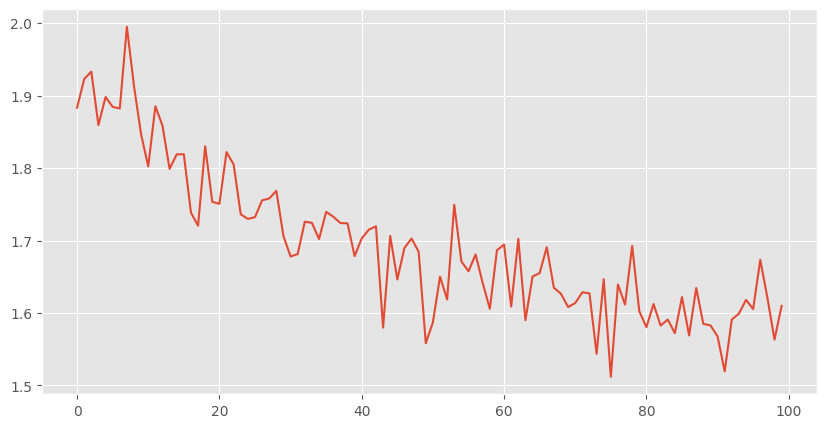

In [28]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["loss"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


KeyError: 'val_accuracy'

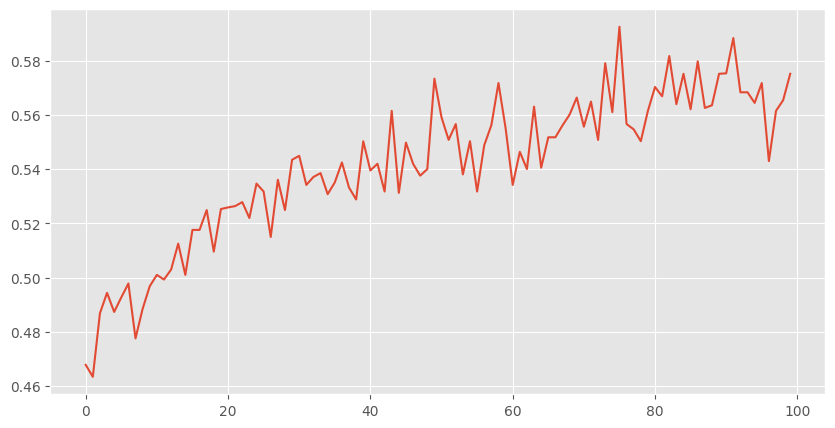

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()